In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [47]:
df = pd.read_csv('stroke.csv')

In [48]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [49]:
df.drop('id',axis=1,inplace=True)

In [50]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [51]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [52]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

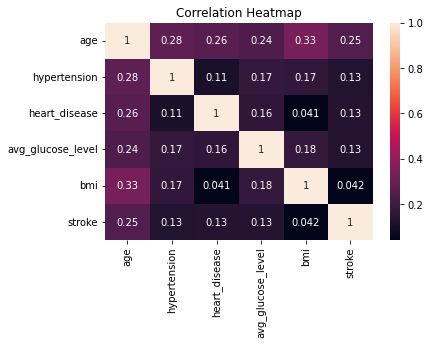

In [53]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

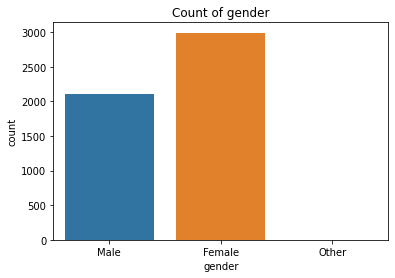

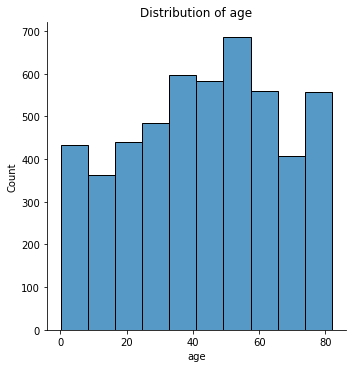

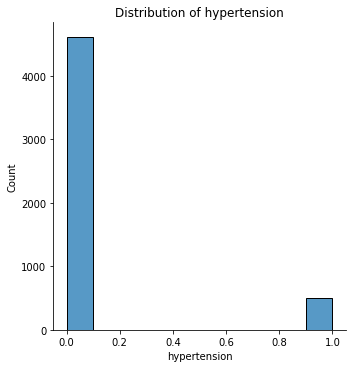

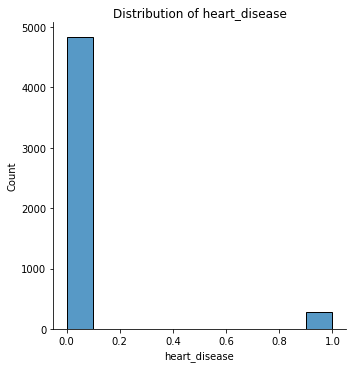

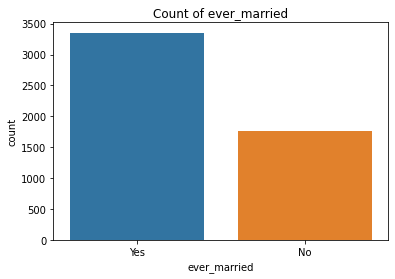

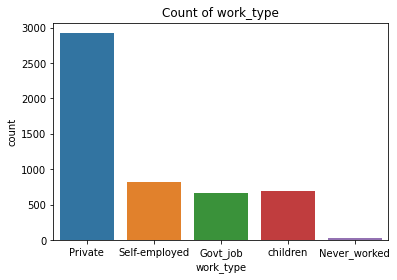

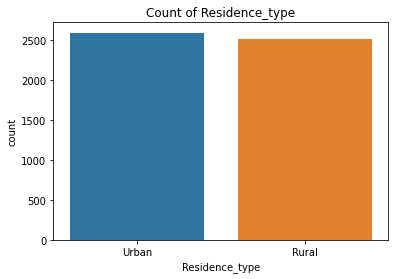

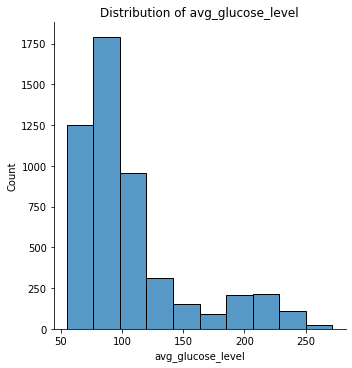

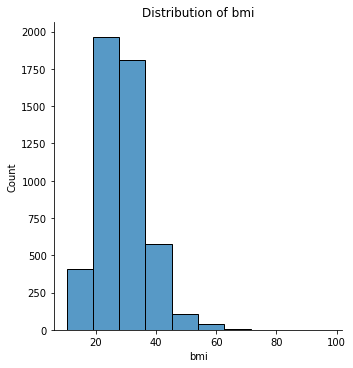

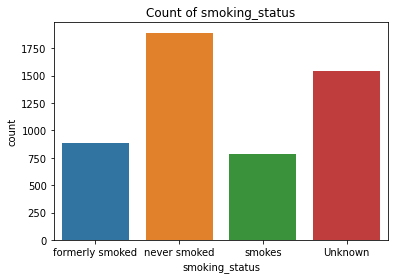

In [54]:
for column in df.columns:
    if column != 'stroke':
        if df[column].dtype != 'O':
            sns.displot(df[column], kde=False, bins=10)
            plt.title(f'Distribution of {column}')
            plt.show()
        else:
            sns.countplot(data=df, x=column)
            plt.title(f'Count of {column}')
            plt.show()

In [55]:
num_other_gender = df[df['gender'] == 'Other'].shape[0]

# Print the number of rows where the gender is 'Other'
print(f'The number of rows where the gender is Other is {num_other_gender}')




The number of rows where the gender is Other is 1


In [57]:
#remove gender = other 
df =df[df['gender'] != 'Other']

In [58]:
# Calculate the mean of non-NaN values in the bmi column
bmi_mean = df['bmi'].mean()

# Fill the NaN values in the bmi column with the mean value
df['bmi'].fillna(bmi_mean, inplace=True)

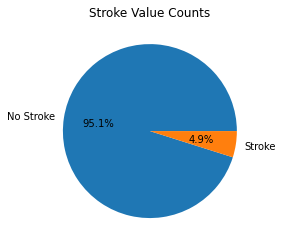

In [59]:
# Plot a pie chart of stroke values before removing unknown smokers
stroke_counts = df['stroke'].value_counts()
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

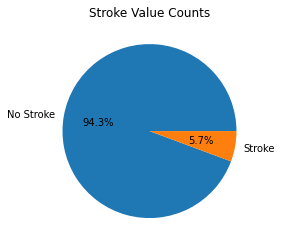

In [60]:
# Removing unknown smokers
df= df[df['smoking_status'] != 'Unknown']
stroke_counts = df['stroke'].value_counts()

# Plot a pie chart of stroke values
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['gender','ever_married','work_type','Residence_type','smoking_status'] 
df[cols] = df[cols].apply(le.fit_transform)

In [62]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60000,0,1
1,0,61.0,0,0,1,3,0,202.21,28.89456,1,1
2,1,80.0,0,1,1,2,0,105.92,32.50000,1,1
3,0,49.0,0,0,1,2,1,171.23,34.40000,2,1
4,0,79.0,1,0,1,3,0,174.12,24.00000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,2,0,77.93,21.70000,1,0
5105,0,80.0,1,0,1,2,1,83.75,28.89456,1,0
5106,0,81.0,0,0,1,3,1,125.20,40.00000,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.60000,1,0


In [63]:
#Performing standardization on continuous variables
from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler to the training data
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [64]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.961273,0,1,1,2,1,2.479202,0.889220,0,1
1,0,0.643316,0,0,1,3,0,1.930834,-0.187682,1,1
2,1,1.650179,0,1,1,2,0,-0.063211,0.316210,1,1
3,0,0.007403,0,0,1,2,1,1.289277,0.581751,2,1
4,0,1.597186,1,0,1,3,0,1.349126,-0.871738,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,0,0.431345,0,0,1,2,0,-0.642849,-1.193183,1,0
5105,0,1.650179,1,0,1,2,1,-0.522324,-0.187682,1,0
5106,0,1.703172,0,0,1,3,1,0.336054,1.364399,1,0
5107,0,-0.734496,0,0,1,3,0,-0.538062,0.050668,1,0


In [65]:
#Crossing age and bmi due to moderate correlation to capture any interactions
df['age_bmi'] = df['age'] * df['bmi']

In [66]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bmi
0,1,0.961273,0,1,1,2,1,2.479202,0.889220,0,1,0.854783
1,0,0.643316,0,0,1,3,0,1.930834,-0.187682,1,1,-0.120739
2,1,1.650179,0,1,1,2,0,-0.063211,0.316210,1,1,0.521802
3,0,0.007403,0,0,1,2,1,1.289277,0.581751,2,1,0.004306
4,0,1.597186,1,0,1,3,0,1.349126,-0.871738,1,1,-1.392328
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0,0.431345,0,0,1,2,0,-0.642849,-1.193183,1,0,-0.514673
5105,0,1.650179,1,0,1,2,1,-0.522324,-0.187682,1,0,-0.309708
5106,0,1.703172,0,0,1,3,1,0.336054,1.364399,1,0,2.323806
5107,0,-0.734496,0,0,1,3,0,-0.538062,0.050668,1,0,-0.037216


In [70]:
#pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 6.2 MB/s eta 0:00:00
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [71]:

from copy import deepcopy
from imblearn.over_sampling import SMOTE
data = deepcopy(df)
X = data.drop('stroke', axis=1)
y = data['stroke']

# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
0    3363
1     202
Name: stroke, dtype: int64
After resampling: 
0    3363
1    1681
Name: stroke, dtype: int64


In [73]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the data
X_resampled1, y_resampled1 = smote_enn.fit_resample(X, y)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y.value_counts()}")
print(f"After resampling: \n{y_resampled1.value_counts()}")

Before resampling: 
0    3363
1     202
Name: stroke, dtype: int64
After resampling: 
1    3248
0    2649
Name: stroke, dtype: int64
